In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
from pathlib import Path
import sys

In [2]:
sys.path.append(str(Path().resolve().parent))
from path_manager import BATT_DATA_DIR, MISC_DIR

In [3]:
reference_dir = BATT_DATA_DIR / 'reference'
brk_df = pd.read_csv(reference_dir / 'brake_once.CSV')
cmean_df = pd.read_csv(reference_dir / 'cons_mean_vel.CSV')
cmax_df = pd.read_csv(reference_dir / 'cons_max_vel.CSV')

In [4]:
def dataframe_gen(df):
    dr_up= df[df['Step Index']==6].reset_index(drop=True)
    dr_down= df[df['Step Index']==10].reset_index(drop=True)
    dr_flat= df[df['Step Index']==14].reset_index(drop=True)
    return dr_up, dr_down, dr_flat

def dict_gen():
    list_arr=[]
    brkup, brkdown, brkflat = dataframe_gen(brk_df)
    cmeanup, cmeandown, cmeanflat= dataframe_gen(cmean_df)
    cmaxup, cmaxdown, cmaxflat= dataframe_gen(cmax_df)

    list_arr.extend([
        brkup, brkdown, brkflat,
        cmeanup, cmeandown, cmeanflat,
        cmaxup, cmaxdown, cmaxflat
    ])
    dict={}
    for d in range (1, len(list_arr)+1):
        dict[d]= list_arr[d-1]
    return dict

Dictionary Keys:  (Up-1st, Down-2nd, Flat-3rd)
1, 2, 3 = Brake check velocity
4, 5, 6 = Mean constant velocity check
7, 8, 9 = Max constant velocity check

In [5]:
vel_test_dict= dict_gen()
vel_test_dict

{1:      Data Point                  Date Time  Test Time (s)  Step Time (s)  \
 0            16  \t06/12/2024 23:44:55.233       602.2461         0.0090   
 1            17  \t06/12/2024 23:44:55.239       602.2525         0.0154   
 2            18  \t06/12/2024 23:44:55.317       602.3308         0.0937   
 3            19  \t06/12/2024 23:44:55.732       602.7454         0.5083   
 4            20  \t06/12/2024 23:44:56.229       603.2426         1.0055   
 ..          ...                        ...            ...            ...   
 158         174  \t06/13/2024 00:03:25.242      1712.2556      1110.0185   
 159         175  \t06/13/2024 00:03:35.243      1722.2564      1120.0193   
 160         176  \t06/13/2024 00:03:45.243      1732.2568      1130.0197   
 161         177  \t06/13/2024 00:03:55.244      1742.2569      1140.0198   
 162         178  \t06/13/2024 00:03:56.225      1743.2384      1141.0013   
 
      Cycle Index  Step Index  TC_Counter1  TC_Counter2  TC_Counter3  \

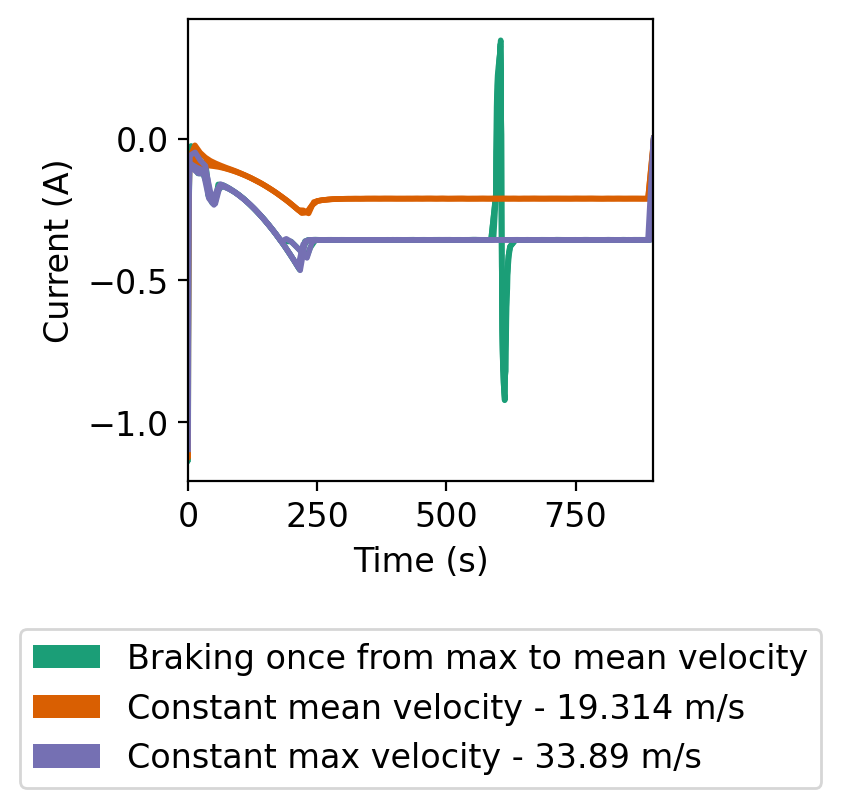

In [6]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (3, 3)
colors = sns.color_palette("Dark2", 3) 

for key in vel_test_dict.keys():
    if key < 4:
        l = 'Braking once from max to mean velocity'
        color = colors[0] 
    if 3 < key < 7:
        l = 'Constant mean velocity'
        color = colors[1] 
    if 6 < key < 10:
        l = 'Constant maximum velocity'
        color = colors[2]

    x_vals = vel_test_dict[key]['Step Time (s)']
    y_vals = vel_test_dict[key][['Current (A)']]
    plt.plot(x_vals, y_vals, linewidth=2, label=l, color=color)


plt.xlim(0, 900)
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
# plt.title('Plot showing Current of the benchmarking trips, with a sequence of Up, Down and Flat road terrains in the legend for each drive cycle')
legend_handles = [
    Patch(facecolor=colors[0], label='Braking once from max to mean velocity'),
    Patch(facecolor=colors[1], label='Constant mean velocity - 19.314 m/s'),
    Patch(facecolor=colors[2], label='Constant max velocity - 33.89 m/s')]
plt.legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.7))
plt.show()

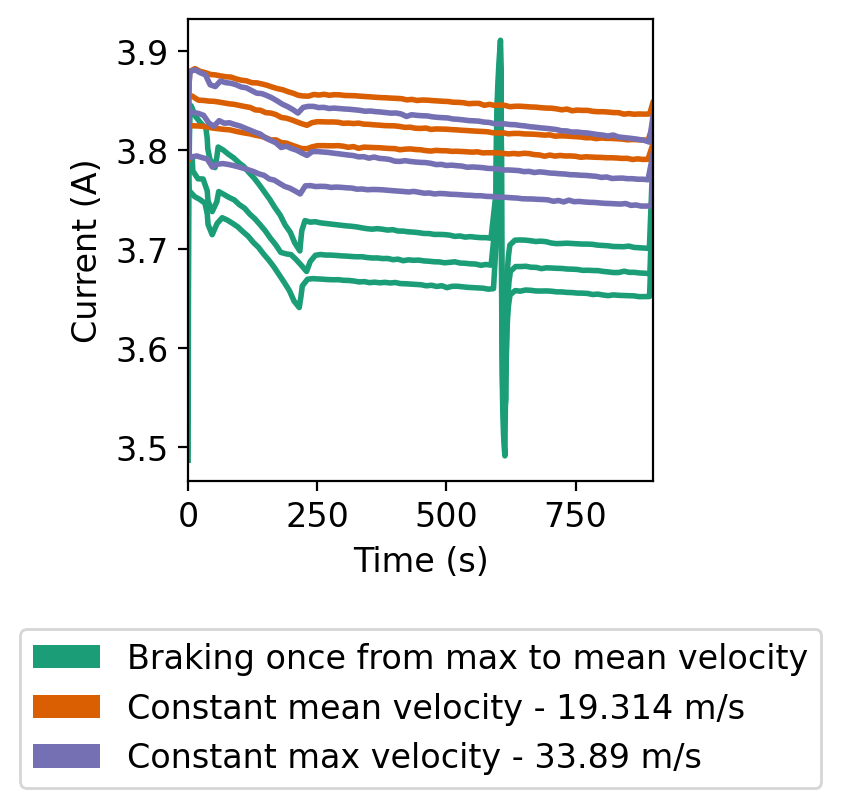

In [7]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (3, 3)
colors = sns.color_palette("Dark2", 3) 

for key in vel_test_dict.keys():
    if key<4:
        l= 'Braking once from max to mean velocity'
        color = colors[0] 
    if key>3 and key<7:
        l= 'Constant mean velocity'
        color = colors[1] 
    if key>6 and key<10:
        l= 'Constant maximum velocity'
        color = colors[2] 
    x_vals= vel_test_dict[key]['Step Time (s)']
    y_vals = vel_test_dict[key][['Voltage (V)']]
    plt.plot(x_vals, y_vals, linewidth=2, color=color, label=l)

plt.xlim(0, 900)
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
# plt.title('Plot showing Voltage of the benchmarking trips, with a sequence of Up, Down and Flat road terrains in the legend for each drive cycle')
legend_handles = [
    Patch(facecolor=colors[0], label='Braking once from max to mean velocity'),
    Patch(facecolor=colors[1], label='Constant mean velocity - 19.314 m/s'),
    Patch(facecolor=colors[2], label='Constant max velocity - 33.89 m/s')]
plt.legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.7))
plt.show()

In [8]:
##info_data_2= pd.DataFrame(columns=['Mini Trip', 'Time(s)', 'Start Voltage(V)', 'End Voltage(V)', 'Peak Current(A)'])
info_data_conbrk =pd.DataFrame()
info_data_conbrk['Mini Trip']= vel_test_dict.keys()

In [9]:
def dis_cap_drop(df):
    total= 0
    for ind in range (1, len(df)):
        time_diff= (df['Step Time (s)'].iloc[ind])-(df['Step Time (s)'].iloc[ind-1])
        curr= df['Current (A)'].iloc[ind]
        total= total+ ((time_diff*curr)/3600)
    return total

In [10]:
def currdrop_sum(df):
    total= 0
    for ind in range (10, len(df)):
        curr_curr= df['Current (A)'].iloc[ind]
        if ((df['Current (A)'].iloc[ind-1])< curr_curr):
            diff= (curr_curr) - (df['Current (A)'].iloc[ind-1])
            total = total+diff
    return total

In [11]:
def brake_calc(df):
    count= 0
    for ind in range (2, len(df)):
        present_current_val= (df['Current (A)'].iloc[ind])-(df['Current (A)'].iloc[ind-1])
        time_diff= (df['Step Time (s)'].iloc[ind])-(df['Step Time (s)'].iloc[ind-1])
        present_current_val_2= (df['Current (A)'].iloc[ind-1])-(df['Current (A)'].iloc[ind-2])
        time_diff_2= (df['Step Time (s)'].iloc[ind-1])-(df['Step Time (s)'].iloc[ind-2])
        didt= present_current_val/time_diff
        didt_2= present_current_val_2/time_diff_2
        if (didt>0 and didt_2<0):
            count= count+1
    return count

In [12]:
def brake_time_calc(df):
    tot_time_arr=[]
    for indd in range (32, len(df)):
        present_current_val= (df['Current (A)'].iloc[indd])-(df['Current (A)'].iloc[indd-1])
        time_diff= (df['Step Time (s)'].iloc[indd])-(df['Step Time (s)'].iloc[indd-1])
        check_curr_1= df['Current (A)'].iloc[indd-2]
        check_curr_2= df['Current (A)'].iloc[indd-1]
        check_curr_3= df['Current (A)'].iloc[indd]
        present_current_val_2= (df['Current (A)'].iloc[indd-1])-(df['Current (A)'].iloc[indd-2])
        time_diff_2= (df['Step Time (s)'].iloc[indd-1])-(df['Step Time (s)'].iloc[indd-2])
        didt= present_current_val/time_diff
        didt_2= present_current_val_2/time_diff_2
        if (check_curr_3>check_curr_2 and check_curr_2>check_curr_1):
            tot_time= time_diff_2
            tot_time_arr.append(tot_time)
    total_time_brake= sum(tot_time_arr)
    return total_time_brake

In [13]:
def volt_sum(df):
    total= 0
    for ind in range (10, len(df)):
        curr_volt= df['Voltage (V)'].iloc[ind]
        if ((df['Voltage (V)'].iloc[ind-1])< curr_volt):
            diff= (curr_volt) - (df['Voltage (V)'].iloc[ind-1])
            total = total+diff
    return total

In [14]:
def dis_cap_drop_area(df):
    time_array=[]
    curr_array=[]
    for ind in range (1, len(df)):
        time_diff= (df['Step Time (s)'].iloc[ind])-(df['Step Time (s)'].iloc[ind-1])
        time_array.append (time_diff)
        curr= df['Current (A)'].iloc[ind]
        curr_array.append(curr)
    timenp= np.array(time_array)
    currnp= np.array(curr_array)
    integration = np.trapz(currnp, timenp)
    return (integration/3600)

In [15]:
def cut_time(df, s, t):
    ##for i in range (len(df)):
      ##  if df['Step Time (s)'].iloc[i]< t:
     ##       time = t
    df_2 = df[df['Step Time (s)'] >= s]
    limited_data = df_2[df_2['Step Time (s)'] <= t]
    return limited_data

In [16]:
def cut_time_ref(vel_test_dict, start_time, end_time):
    cut_dict={}
    data_list=[]
    for key in vel_test_dict.keys():
        datafr= cut_time(vel_test_dict[key], start_time, end_time)
        data_list.append(datafr)
    cut_dict={f'Minitrip{i+1}': dataf for i, dataf in enumerate(data_list)}
    return cut_dict

In [17]:
cut_vel_data_dict = cut_time_ref(vel_test_dict, 300, 400)

In [18]:
def find_time_vpercentile(df):
    timediff_arr=[]
    volt_arr=[]
    time10=0
    time20=0
    time30=0
    time40=0
    time50=0
    time60=0
    time70=0
    time80=0
    time90=0
    time100=0
    for i in range (1,len(df)):
        volt= df['Voltage (V)'].iloc[i]
        volt_arr.append(volt)
        timediff= (df['Step Time (s)'].iloc[i])- (df['Step Time (s)'].iloc[i-1])
        timediff_arr.append(timediff)
    timediffnp= np.array(timediff_arr)
    voltnp= np.array(volt_arr)
    perc10= np.percentile(voltnp, 10)
    perc20= np.percentile(voltnp, 20)
    perc30= np.percentile(voltnp, 30)
    perc40= np.percentile(voltnp, 40)
    perc50= np.percentile(voltnp, 50)
    perc60= np.percentile(voltnp, 60)
    perc70= np.percentile(voltnp, 70)
    perc80= np.percentile(voltnp, 80)
    perc90= np.percentile(voltnp, 90)
    perc100= np.percentile(voltnp, 100)
    for j in range (len(volt_arr)):
        if voltnp[j]<= perc10:
            time10= time10+ (timediffnp[j])
        if voltnp[j]<= perc20:
            time20= time20+ (timediffnp[j])
        if voltnp[j]<= perc30:
            time30= time30+ (timediffnp[j])
        if voltnp[j]<= perc40:
            time40= time40+ (timediffnp[j])
        if voltnp[j]<= perc50:
            time50= time50+ (timediffnp[j])
        if voltnp[j]<= perc60:
            time60= time60+ (timediffnp[j])
        if voltnp[j]<= perc70:
            time70= time70+ (timediffnp[j])
        if voltnp[j]<= perc80:
            time80= time80+ (timediffnp[j])
        if voltnp[j]<= perc90:
            time90= time90+ (timediffnp[j])
        if voltnp[j]<= perc100:
            time100= time100+ (timediffnp[j])
    time10_20= time20- time10
    time20_30= time30- time20
    time30_40= time40- time30
    time40_50= time50- time40
    time50_60= time60- time50
    time60_70= time70- time60
    time70_80= time80- time70
    time80_90= time90- time80
    time90_100= time100- time90
    return time10, time10_20, time20_30, time30_40, time40_50, time50_60, time60_70, time70_80, time80_90, time90_100

In [19]:
def find_time_cpercentile(df): 
    timediff_arr=[]
    curr_arr=[]
    time10=0
    time20=0
    time30=0
    time40=0
    time50=0
    time60=0
    time70=0
    time80=0
    time90=0
    time100=0
    for i in range (1,len(df)-10):
        current= df['Current (A)'].iloc[i]
        curr_arr.append(current)
        timediff= (df['Step Time (s)'].iloc[i])- (df['Step Time (s)'].iloc[i-1])
        timediff_arr.append(timediff)
    timediffnp= np.array(timediff_arr)
    currnp= np.array(curr_arr)
    perc10= np.percentile(currnp, 10)
    perc20= np.percentile(currnp, 20)
    perc30= np.percentile(currnp, 30)
    perc40= np.percentile(currnp, 40)
    perc50= np.percentile(currnp, 50)
    perc60= np.percentile(currnp, 60)
    perc70= np.percentile(currnp, 70)
    perc80= np.percentile(currnp, 80)
    perc90= np.percentile(currnp, 90)
    perc100= np.percentile(currnp, 100)
    for j in range (len(curr_arr)):
        if currnp[j]<= perc10:
            time10= time10+ (timediffnp[j])
        if currnp[j]<= perc20:
            time20= time20+ (timediffnp[j])
        if currnp[j]<= perc30:
            time30= time30+ (timediffnp[j])
        if currnp[j]<= perc40:
            time40= time40+ (timediffnp[j])
        if currnp[j]<= perc50:
            time50= time50+ (timediffnp[j])
        if currnp[j]<= perc60:
            time60= time60+ (timediffnp[j])
        if currnp[j]<= perc70:
            time70= time70+ (timediffnp[j])
        if currnp[j]<= perc80:
            time80= time80+ (timediffnp[j])
        if currnp[j]<= perc90:
            time90= time90+ (timediffnp[j])
        if currnp[j]<= perc100:
            time100= time100+ (timediffnp[j])
    time10_20= time20- time10
    time20_30= time30- time20
    time30_40= time40- time30
    time40_50= time50- time40
    time50_60= time60- time50
    time60_70= time70- time60
    time70_80= time80- time70
    time80_90= time90- time80
    time90_100= time100- time90
    return time10, time10_20, time20_30, time30_40, time40_50, time50_60, time60_70, time70_80, time80_90, time90_100

In [20]:
def dis_cap_drop_tester(df):
    dis_drop= (df['Discharge Capacity (Ah)'].iloc[0])- (df['Discharge Capacity (Ah)'].iloc[-1])
    return dis_drop

In [21]:
vel_info= pd.read_csv(MISC_DIR / 'velocity_data.csv')

In [22]:
def features_ext_ref(dict):
    time_arr=[]
    start_volts_arr=[]
    end_volts_arr=[]
    peak_curr_arr=[]
    min_curr_arr=[]
    discharge_arr=[]
    mean_volts_arr=[]
    med_curr_arr=[]
    soc_cc_arr=[]
    max_dvdt_arr=[]
    min_dvdt_arr=[]
    avg_dvdt_arr=[]
    discharge_area_arr=[]
    soc_area=[]
    t10_arr=[]
    t20_arr=[]
    t30_arr=[]
    t40_arr=[]
    t50_arr=[]
    t60_arr=[]
    t70_arr=[]
    t80_arr=[]
    t90_arr=[]
    t100_arr=[]
    tc10_arr=[]
    tc20_arr=[]
    tc30_arr=[]
    tc40_arr=[]
    tc50_arr=[]
    tc60_arr=[]
    tc70_arr=[]
    tc80_arr=[]
    tc90_arr=[]
    tc100_arr=[]
    dis_drop_tester_arr=[]
    volt_rise=[]
    curr_rise_arr=[]
    brakes=[]
    brake_time_arr=[]
    var_curr_arr=[]
    mean_curr_arr=[]
    for key in dict.keys():
        time= (dict[key]['Step Time (s)'].max())-(dict[key]['Step Time (s)'].min())
        time_arr.append(time)
        start_volts= dict[key]['Voltage (V)'].iloc[0]
        end_volts= dict[key]['Voltage (V)'].iloc[-1]
        mean_volts= dict[key]['Voltage (V)'].mean()
        start_volts_arr.append(start_volts)
        end_volts_arr.append(end_volts)
        mean_volts_arr.append(mean_volts)
        peak_curr= dict[key]['Current (A)'].max() 
        min_curr= dict[key]['Current (A)'].min()
        med_curr= dict[key]['Current (A)'].median()
        med_curr_arr.append(med_curr)
        var_curr= dict[key]['Current (A)'].var()
        var_curr_arr.append(var_curr)
        mean_curr= dict[key]['Current (A)'].mean()
        mean_curr_arr.append(mean_curr)
        peak_curr_arr.append(peak_curr)
        min_curr_arr.append(min_curr)
        discharge= dis_cap_drop(dict[key])
        discharge_int= dis_cap_drop_area(dict[key])
        soc_cc= (discharge/(3))*100
        soc_cc_area= (discharge_int/(3))*100
        soc_cc_arr.append(soc_cc)
        soc_area.append(soc_cc_area)
        discharge_arr.append(discharge)
        discharge_area_arr.append(discharge_int)
        max_dvdt= dict[key]['dV/dt (V/s)'].max() 
        max_dvdt_arr.append(max_dvdt)
        min_dvdt= dict[key]['dV/dt (V/s)'].min() 
        min_dvdt_arr.append(min_dvdt)
        avg_dvdt= dict[key]['dV/dt (V/s)'].mean() 
        avg_dvdt_arr.append(avg_dvdt)
        sum_volt_rise= volt_sum(dict[key])
        volt_rise.append(sum_volt_rise)
        curr_rise= currdrop_sum(dict[key])
        curr_rise_arr.append(curr_rise)
        # t10, t10_20, t20_30, t30_40, t40_50, t50_60, t60_70, t70_80, t80_90, t90_100= find_time_vpercentile(dict[key])
        # tc10, tc10_20, tc20_30, tc30_40, tc40_50, tc50_60, tc60_70, tc70_80, tc80_90, tc90_100= find_time_cpercentile(dict[key])
        # t10_arr.append(t10)
        # t20_arr.append(t10_20)
        # t30_arr.append(t20_30)
        # t40_arr.append(t30_40)
        # t50_arr.append(t40_50)
        # t60_arr.append(t50_60)
        # t70_arr.append(t60_70)
        # t80_arr.append(t70_80)
        # t90_arr.append(t80_90)
        # t100_arr.append(t90_100)
        # tc10_arr.append(tc10)
        # tc20_arr.append(tc10_20)
        # tc30_arr.append(tc20_30)
        # tc40_arr.append(tc30_40)
        # tc50_arr.append(tc40_50)
        # tc60_arr.append(tc50_60)
        # tc70_arr.append(tc60_70)
        # tc80_arr.append(tc70_80)
        # tc90_arr.append(tc80_90)
        # tc100_arr.append(tc90_100)
        dis_drop_t= dis_cap_drop_tester(dict[key])
        dis_drop_tester_arr.append(dis_drop_t)
        brake_num= brake_calc(dict[key])
        brakes.append(brake_num)
        brake_time= brake_time_calc(dict[key])
        brake_time_arr.append(brake_time)
    info_data_conbrk['Time(s)']= time_arr
    # info_data_conbrk['Time below 10 perc V']= t10_arr
    # info_data_conbrk['Time b/w 10-20 perc V']= t20_arr
    # info_data_conbrk['Time b/w 20-30 perc V']= t30_arr
    # info_data_conbrk['Time b/w 30-40 perc V']= t40_arr
    # info_data_conbrk['Time b/w 40-50 perc V']= t50_arr
    # info_data_conbrk['Time b/w 50-60 perc V']= t60_arr
    # info_data_conbrk['Time b/w 60-70 perc V']= t70_arr
    # info_data_conbrk['Time b/w 70-80 perc V']= t80_arr
    # info_data_conbrk['Time b/w 80-90 perc V']= t90_arr
    # info_data_conbrk['Time b/w 90-100 perc V']= t100_arr
    # info_data_conbrk['Time below 10 perc A']= tc10_arr
    # info_data_conbrk['Time b/w 10-20 perc A']= tc20_arr
    # info_data_conbrk['Time b/w 20-30 perc A']= tc30_arr
    # info_data_conbrk['Time b/w 30-40 perc A']= tc40_arr
    # info_data_conbrk['Time b/w 40-50 perc A']= tc50_arr
    # info_data_conbrk['Time b/w 50-60 perc A']= tc60_arr
    # info_data_conbrk['Time b/w 60-70 perc A']= tc70_arr
    # info_data_conbrk['Time b/w 70-80 perc A']= tc80_arr
    # info_data_conbrk['Time b/w 80-90 perc A']= tc90_arr
    # info_data_conbrk['Time b/w 90-100 perc A']= tc100_arr
    info_data_conbrk['Start Voltage(V)']= start_volts_arr
    info_data_conbrk['End Voltage(V)']= end_volts_arr
    info_data_conbrk['Mean Voltage(V)']= mean_volts_arr
    info_data_conbrk['Peak Current(A)']= peak_curr_arr
    info_data_conbrk['Peak Min_dis Current(A)']= min_curr_arr
    info_data_conbrk['Median Current(A)']= med_curr_arr
    info_data_conbrk['Variance Current(A)']= var_curr_arr
    info_data_conbrk['Mean Current(A)']= mean_curr_arr
    ##info_data_2['SOC_CC (%)']= soc_cc_arr
    info_data_conbrk['Peak dV/dt']= max_dvdt_arr
    info_data_conbrk['Min dV/dt']= min_dvdt_arr
    info_data_conbrk['Avg dV/dt']= avg_dvdt_arr
    info_data_conbrk['Total Voltage Rise']= volt_rise
    info_data_conbrk['Total Current Rise']= curr_rise_arr
    info_data_conbrk['Number of brakes']= brakes
    info_data_conbrk['Total brake time']= brake_time_arr
    ##info_data_2['Discharge Cap. Drop tester (Ah)']= dis_drop_tester_arr
    ##info_data_2['Discharge Cap. Drop(Ah)_CC']= discharge_arr
    info_data_conbrk['SOC_drop (%)']= soc_cc_arr
    rel_soc= info_data_conbrk['SOC_drop (%)'].iloc[-1]
    info_data_conbrk['Relative_SOC_drop']= (((info_data_conbrk['SOC_drop (%)']-rel_soc)/rel_soc)+1)*100
    ##info_data_2['SOC_drop unit time']= (info_data_2['SOC_drop (%)'])/(info_data_2['Time(s)'])
    return info_data_conbrk, rel_soc

In [23]:
info_data_conbrk, relative_soc= features_ext_ref(vel_test_dict)
info_data_conbrk

,Mini Trip,Time(s),Start Voltage(V),End Voltage(V),Mean Voltage(V),Peak Current(A),Peak Min_dis Current(A),Median Current(A),Variance Current(A),Mean Current(A),Peak dV/dt,Min dV/dt,Avg dV/dt,Total Voltage Rise,Total Current Rise,Number of brakes,Total brake time,SOC_drop (%),Relative_SOC_drop
0,1,1140.9923,3.486808,3.806990,3.737328,0.335221,-1.135662,-0.356996,0.069471,-0.287410,0.192350,-0.148165,0.002055,0.542689,1.831924,32,184.1282,-2.709490,98.612004
1,2,892.9963,3.791321,3.778285,3.699987,0.327657,-0.847897,-0.357069,0.044706,-0.314466,0.073693,-0.281753,-0.001607,0.469321,1.599825,24,133.7764,-2.706763,98.512763
2,3,900.4970,3.769235,3.753552,3.672514,0.347556,-0.922124,-0.357140,0.049328,-0.325540,0.131605,-0.174503,-0.000880,0.507942,1.735271,25,79.3263,-2.723145,99.108984
3,4,1140.9956,3.868619,3.858957,3.853076,0.000690,-1.127349,-0.211520,0.019365,-0.167857,0.085955,-0.016879,0.001091,0.035190,0.271074,30,246.7621,-1.623396,59.083575
4,5,891.0010,3.853999,3.828345,3.825018,0.000279,-0.262048,-0.211659,0.002262,-0.193125,0.044078,-0.012008,0.000429,0.026059,0.268058,19,119.9516,-1.621278,59.006490
5,6,891.0018,3.824780,3.809309,3.802480,0.000537,-0.262157,-0.211569,0.002370,-0.192559,0.019779,-0.005288,0.000522,0.030367,0.267122,19,109.9582,-1.616015,58.814927
6,7,1140.9955,3.797858,3.846279,3.838465,0.000490,-1.097208,-0.357037,0.030429,-0.267542,0.078579,-0.009353,0.001306,0.058834,0.532599,31,157.3674,-2.736162,99.582731
7,8,891.0023,3.838187,3.799633,3.792255,0.000163,-0.421030,-0.357155,0.006367,-0.324315,0.019058,-0.006881,0.000236,0.039391,0.436441,26,119.9566,-2.722858,99.098544
8,9,894.1348,3.793304,3.773081,3.760196,0.000161,-0.464837,-0.357162,0.007164,-0.323638,0.011048,-0.000537,0.000286,0.044006,0.471865,24,113.0939,-2.747627,100.000000


In [24]:
relative_soc

-2.747626770669594

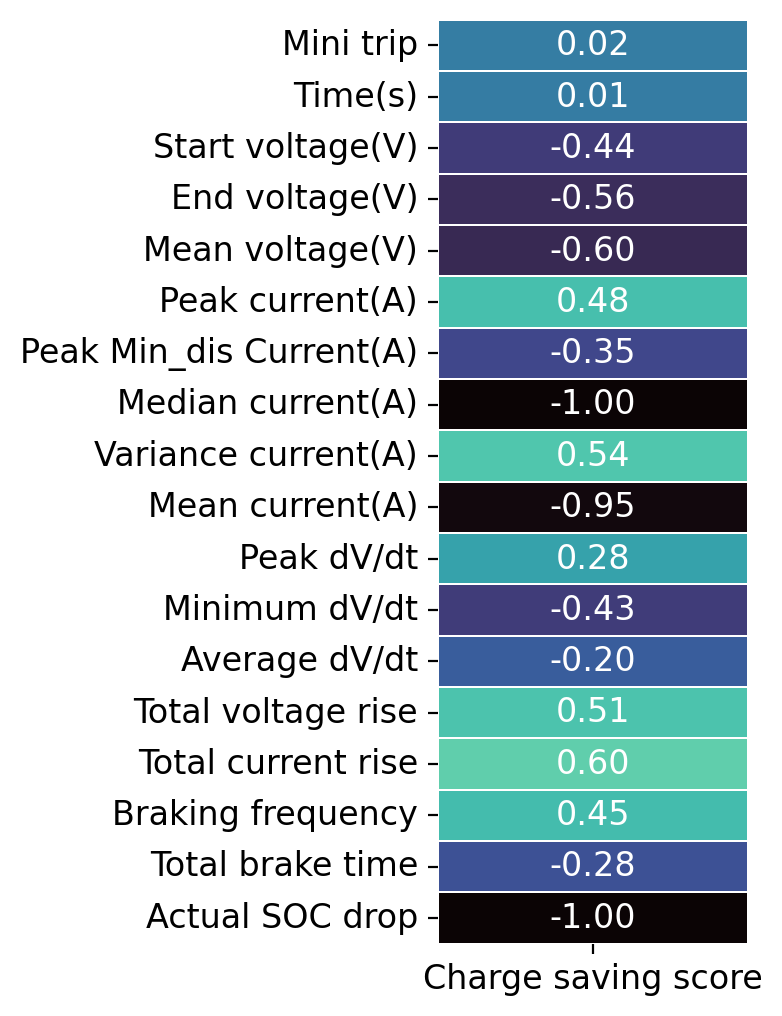

In [25]:
def corr_map(info_data_conbrk):
    last_column = info_data_conbrk.iloc[:, -1]
    corr_mat = info_data_conbrk.corr()
    target_corr= corr_mat[['Relative_SOC_drop']].drop(['Relative_SOC_drop'], axis=0)    ##corr_matrix[['Target']].drop(['Target'], axis=0)

    rename_dict = {'Mini Trip' : 'Mini trip',
                   'Start Voltage(V)' : 'Start voltage(V)',
                   'End Voltage(V)' : 'End voltage(V)',
                   'Mean Voltage(V)' : 'Mean voltage(V)',
                   'Peak Current(A)' : 'Peak current(A)',
                   'Median Current(A)' : 'Median current(A)',
                   'Mean Current(A)' : 'Mean current(A)',
                   'Variance Current(A)' : 'Variance current(A)',
                   'Min dV/dt' : 'Minimum dV/dt',
                   'Avg dV/dt' : 'Average dV/dt',
                   'Total Voltage Rise' :'Total voltage rise',
                   'Total Current Rise' : 'Total current rise',
                   'Number of brakes': 'Braking frequency',
                    'SOC_drop (%)': 'Actual SOC drop'
                }
    

    target_corr.columns = ['Charge saving score']  # Rename x-axis label
    target_corr.index = target_corr.index.to_series().replace(rename_dict)

    sns.reset_orig()
    plt.rcdefaults()
    plt.rcParams['font.size'] = 12
    plt.rcParams['figure.figsize'] = (2, 6)
    sns.heatmap(target_corr,     
                annot=True,
                cmap="mako",
                fmt=".2f",
                vmin=-1,
                vmax=1,
                linewidths=0.01,
                annot_kws={"color": "white"},  
                cbar_kws={"label": "Correlation Coefficient"} , cbar = False)
    plt.show()

corr_map(info_data_conbrk)

In [26]:
cut_dict={}
data_list=[]
for key in vel_test_dict.keys():
    datafr= cut_time(vel_test_dict[key], 300, 800)  ##Function to select the time limit till what we want to cut down the data to
    data_list.append(datafr)
cut_dict={f'Minitrip{i+1}': dataf for i, dataf in enumerate(data_list)}

In [27]:
cut_data,r_soc= features_ext_ref(cut_dict)
cut_data

,Mini Trip,Time(s),Start Voltage(V),End Voltage(V),Mean Voltage(V),Peak Current(A),Peak Min_dis Current(A),Median Current(A),Variance Current(A),Mean Current(A),Peak dV/dt,Min dV/dt,Avg dV/dt,Total Voltage Rise,Total Current Rise,Number of brakes,Total brake time,SOC_drop (%),Relative_SOC_drop
0,1,486.5226,3.723672,3.704184,3.714442,0.335221,-0.923805,-0.357183,7.205244e-02,-0.348167,0.065066,-0.148165,-0.001806,0.369004,1.263424,16,36.5992,-1.581206,97.567817
1,2,487.4069,3.693105,3.678420,3.690590,0.327657,-0.847897,-0.357141,6.217232e-02,-0.336694,0.065259,-0.281753,-0.003996,0.347585,1.179321,15,67.8958,-1.584445,97.767654
2,3,492.0066,3.668635,3.654715,3.661755,0.347556,-0.922124,-0.357191,6.739081e-02,-0.353115,0.064391,-0.174503,-0.003341,0.375132,1.272338,16,47.3464,-1.607762,99.206462
3,4,490.0299,3.855424,3.839017,3.847449,-0.211335,-0.212119,-0.211668,3.547055e-08,-0.211648,0.002900,-0.016879,-0.000401,0.004711,0.003178,18,10.0012,-0.960279,59.253716
4,5,490.0375,3.827298,3.811825,3.819824,-0.211216,-0.212320,-0.211674,4.293094e-08,-0.211701,0.000966,-0.012008,-0.000469,0.002503,0.004047,14,20.0015,-0.960513,59.268179
5,6,490.0310,3.804174,3.792974,3.798388,-0.211190,-0.212354,-0.211615,3.692694e-08,-0.211636,0.002203,-0.005288,-0.000064,0.005750,0.002512,14,40.0015,-0.960196,59.248563
6,7,490.0334,3.841757,3.815909,3.829612,-0.356883,-0.357648,-0.357180,2.718243e-08,-0.357185,0.006867,-0.000192,0.000231,0.002033,0.004221,17,20.0008,-1.620694,100.004403
7,8,490.0328,3.795905,3.773679,3.783772,-0.356810,-0.357833,-0.357232,3.555568e-08,-0.357223,0.000064,-0.006881,-0.000225,0.002491,0.003863,18,20.0011,-1.620842,100.013556
8,9,490.0263,3.762124,3.746820,3.754313,-0.356711,-0.357492,-0.357190,3.044781e-08,-0.357179,0.002184,-0.000132,0.000044,0.004190,0.004290,16,30.0028,-1.620623,100.000000


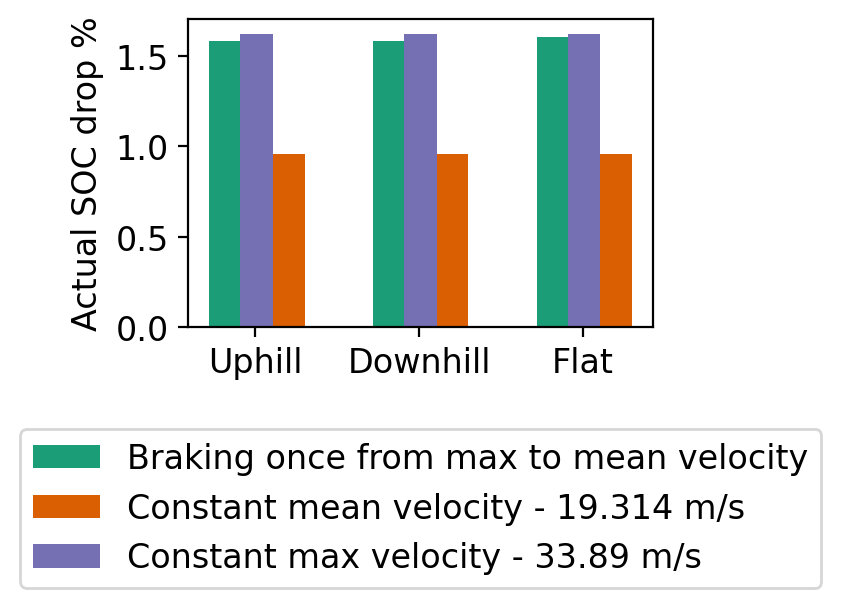

In [28]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (3, 2)
colors = sns.color_palette("Dark2", 3) 

values_br=[]
values_consmean=[]
values_consmax=[]
for ii in range (len(cut_data)):
    if ii<3:
        values_br.append(-cut_data['SOC_drop (%)'].iloc[ii])
    if ii>2 and ii<6:
        values_consmean.append(-cut_data['SOC_drop (%)'].iloc[ii])
    if ii>5 and ii<9:
        values_consmax.append(-cut_data['SOC_drop (%)'].iloc[ii])
    

labels = ['Uphill', 'Downhill', 'Flat']
bar_width = 0.20
x = np.arange(len(labels))
         
plt.bar(x - bar_width/1.1, values_br, width=bar_width, color=colors[0], label='Braking once from max to mean velocity')
plt.bar(x + bar_width/1, values_consmean, width=bar_width, color=colors[1], label='Constant mean velocity - 19.314 m/s')
plt.bar(x + bar_width/32, values_consmax, width=bar_width, color=colors[2],  label='Constant max velocity - 33.89 m/s')

plt.ylabel('Actual SOC drop %')
plt.xticks(x, labels) 
legend_handles = [
    Patch(facecolor=colors[0], label='Braking once from max to mean velocity'),
    Patch(facecolor=colors[1], label='Constant mean velocity - 19.314 m/s'),
    Patch(facecolor=colors[2], label='Constant max velocity - 33.89 m/s')]
plt.legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.9))
plt.show()

In [29]:
reg_br_vals=[]
cons_vals=[]
terr= ['uphill', 'downhill', 'flatplane']
for nn in range (3):
    reg_br= values_consmax[nn]-values_br[nn]
    reg_br_vals.append(reg_br)
    cons_diff= values_consmax[nn]-values_consmean[nn]
    cons_vals.append(cons_diff)
check_soc= pd.DataFrame()
check_soc['Terrain']= terr
check_soc['Difference in SoC Drop % b/w Max and Mean const. vel'] = cons_vals
check_soc['Regenerative SoC rise % due to one brake from Max to Mean vel']= reg_br_vals

check_soc

,Terrain,Difference in SoC Drop % b/w Max and Mean const. vel,Regenerative SoC rise % due to one brake from Max to Mean vel
0,uphill,0.660415,0.039488
1,downhill,0.660329,0.036398
2,flatplane,0.660427,0.012860


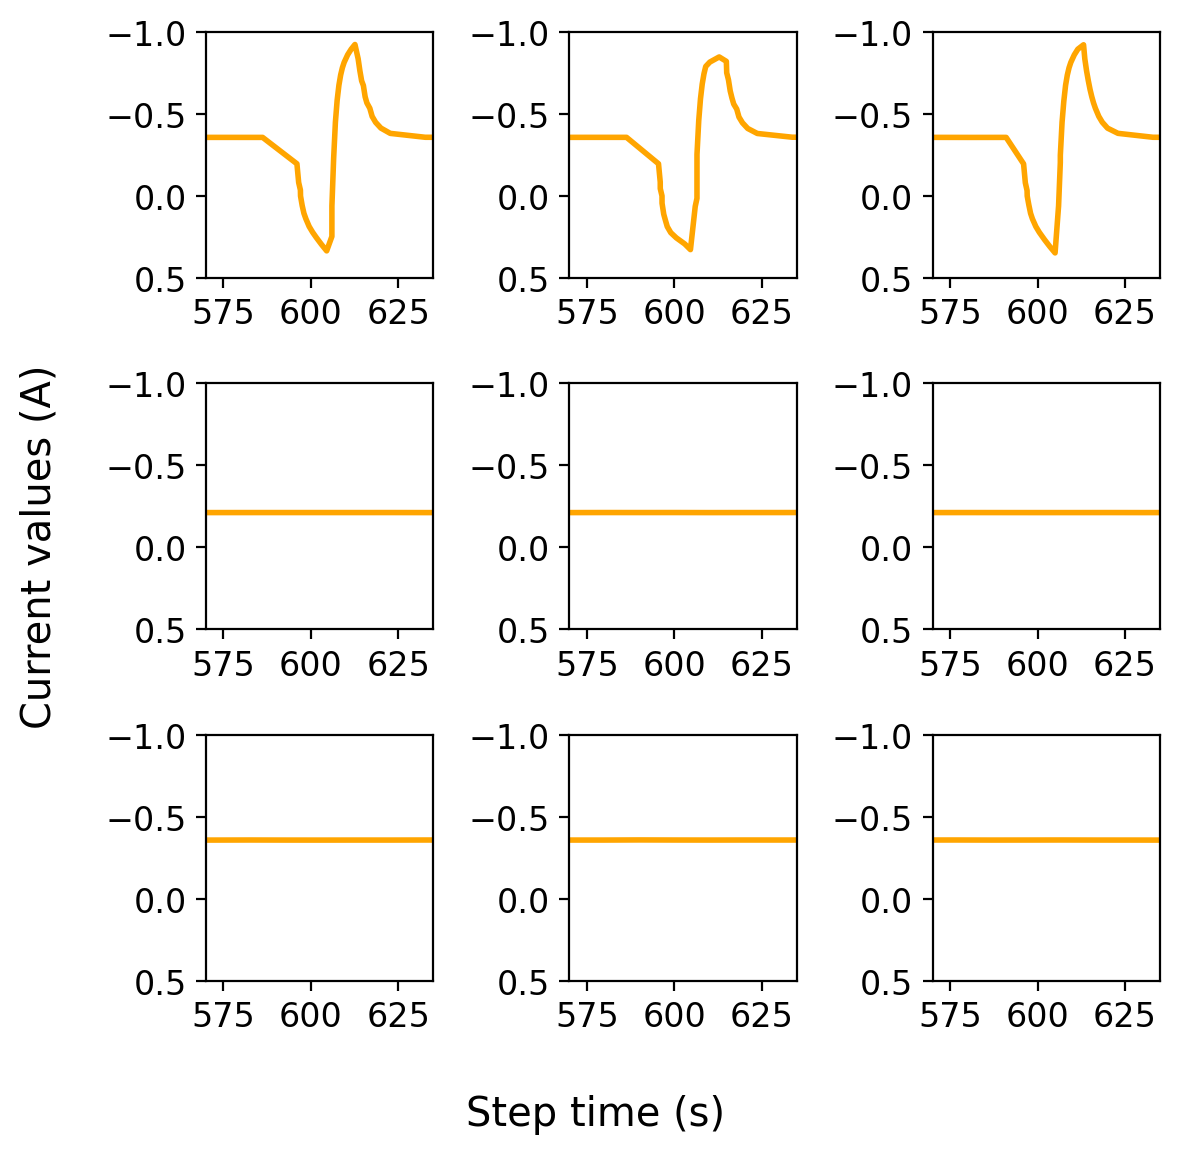

In [30]:
def plot_conbrk(ax, df):
    y_vals = df['Current (A)']
    x_vals = df['Step Time (s)']
    
    ax.plot(x_vals, y_vals, linewidth=2, color = 'orange')
    ax.set_xlim(570, 635)
    ax.set_ylim(0.5, -1.0)
    # ax.set_title(f"Plot {df.name}")

sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
fig, axes = plt.subplots(3, 3, figsize=(6, 6))  
axes = axes.flatten() 

for i, kd in enumerate(cut_dict.keys()):
    plot_conbrk(axes[i], cut_dict[kd])

fig.supxlabel('Step time (s)')
fig.supylabel('Current values (A)')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()